In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image

In [ ]:
#from google.colab import files

##for fn in uploaded.keys():
  #print('You uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the data 
data = os.listdir("/content/drive/MyDrive/Colab Notebooks/myData/myData" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
  data_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/myData/myData/{num}".format(num=i))
  for j in data_list:
   # x = print(data_list[j])
    pic = cv2.imread("/content/drive/MyDrive/Colab Notebooks/myData/myData/{num}/{img}".format(num=i,img =j))
    pic = cv2.resize(pic, dsize=(32,32))
    data_X.append(pic)
    data_y.append(i)
  #if len(data_X) == len(data_y) :
     #print("Total Dataponits = ",len(data_X))
# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)


In [ ]:
#'/content/drive/MyDrive/Colab Notebooks/myData'
len(data)

10

In [ ]:
#len()

In [ ]:
data_X 

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#from zipfile import ZipFile
#file_name = r"C:\Users\amary\Downloads\myData.zip"

#with ZipFile(file_name, 'r') as zip:
#3  zip.extractall()
 # print('Done')

In [ ]:
data_y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(len(data))

10


In [ ]:
print(len(data_y))

10190


In [ ]:
print(pic)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
len(data_list)

1016

In [ ]:
#Spliting the train validation and test sets
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7744, 32, 32, 3)
Validation Set Shape =  (1936, 32, 32, 3)
Test Set Shape =  (510, 32, 32, 3)


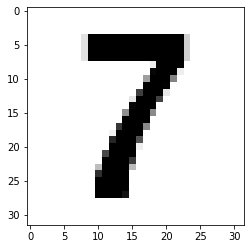

In [ ]:
plt.imshow(train_X[22])

In [ ]:
def Prep(img):
    
    img = img/255 #normalizing
    return img
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [ ]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
#Creating a Neural Network
model = Sequential()
model.add((Conv2D(60,(5,5),input_shape=(32, 32, 3) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        4560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                    

In [ ]:
#Compiling the model
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                           epochs = 30, 
                              verbose = 2, steps_per_epoch= 200)

# Testing the model on the test set
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


200/200 - 12s - loss: 1.0175 - accuracy: 0.6434 - 12s/epoch - 58ms/step
Epoch 2/30
200/200 - 4s - loss: 0.3022 - accuracy: 0.9050 - 4s/epoch - 19ms/step
Epoch 3/30
200/200 - 4s - loss: 0.2085 - accuracy: 0.9339 - 4s/epoch - 20ms/step
Epoch 4/30
200/200 - 4s - loss: 0.1700 - accuracy: 0.9486 - 4s/epoch - 19ms/step
Epoch 5/30
200/200 - 4s - loss: 0.1557 - accuracy: 0.9564 - 4s/epoch - 19ms/step
Epoch 6/30
200/200 - 4s - loss: 0.1346 - accuracy: 0.9611 - 4s/epoch - 20ms/step
Epoch 7/30
200/200 - 4s - loss: 0.1221 - accuracy: 0.9622 - 4s/epoch - 20ms/step
Epoch 8/30
200/200 - 4s - loss: 0.1185 - accuracy: 0.9664 - 4s/epoch - 20ms/step
Epoch 9/30
200/200 - 4s - loss: 0.1090 - accuracy: 0.9688 - 4s/epoch - 20ms/step
Epoch 10/30
200/200 - 4s - loss: 0.1097 - accuracy: 0.9664 - 4s/epoch - 20ms/step
Epoch 11/30
200/200 - 4s - loss: 0.1056 - accuracy: 0.9734 - 4s/epoch - 20ms/step
Epoch 12/30
200/200 - 4s - loss: 0.1021 - accuracy: 0.9708 - 4s/epoch - 20ms/step
Epoch 13/30
200/200 - 4s - loss: 0

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
 #   json_file.write(model_json)
# serialize weights to HDF5
  #model.save_weights("model.h5")
  #print("Saved model to disk")

In [ ]:
json_file = open('/content/drive/MyDrive/Colab Notebooks/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model.h5")

In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
#model.save("my_model")

# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("my_model")

In [ ]:
#reconstructed_model = keras.models.load_model("my_model")

In [ ]:
test_X[0].shape

(32, 32, 3)

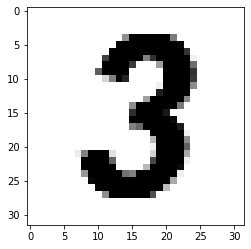

In [ ]:
plt.imshow(test_X[35]) 

In [ ]:
prediction = loaded_model.predict(test_X)
print(np.argmax(prediction[35]))

16/16 [==============================] - 7s 10ms/step
3


In [ ]:
import matplotlib.image as mpimg

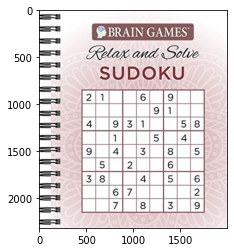

In [ ]:
#Randomly select an image from the dataset
sudoku = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image.jpeg")
plt.figure()
#mg = sudoku.astype(float)
#image = mpimg.imread("/content/drive/MyDrive/Colab Notebooks/image")
plt.imshow(sudoku)
plt.show()
#print(sudoku)

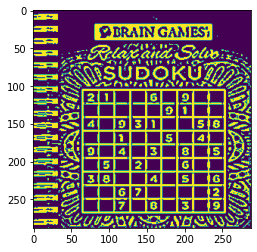

In [ ]:
#Preprocessing image to be read
sudoku = cv2.resize(sudoku, (288,288))
# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  blur = cv2.GaussianBlur(gray, (3,3),6)
   
    #blur = cv2.bilateralFilter(gray,9,75,75)
  threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
  return threshold_img
threshold = preprocess(sudoku)
#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

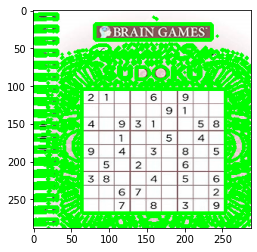

In [ ]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku.copy()
contour_2 = sudoku.copy()
contour, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)
#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

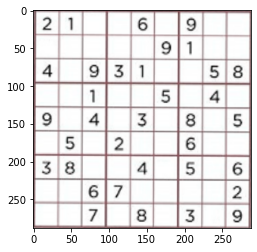

In [ ]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    
    for i in contour:
        area = cv2.contourArea(i)
        #if area >50:
        peri = cv2.arcLength(i, True)
        approx = cv2.approxPolyDP(i , 0.003* peri, True)
        if area > max_area and len(approx) ==4:
          biggest = approx
          max_area = area
    return biggest ,max_area
def reframe(points):
   points = points.reshape((4, 2))
   points_new = np.zeros((4,1,2),dtype = np.int32)
   add = points.sum(1)
   points_new[0] = points[np.argmin(add)]
   points_new[3] = points[np.argmax(add)]
   diff = np.diff(points, axis =1)
   points_new[1] = points[np.argmin(diff)]
   points_new[2] = points[np.argmax(diff)]
   return points_new
def splitcells(img):
   rows = np.vsplit(img,9)
   boxes = []
   for r in rows:
      cols = np.hsplit(r,9)
      for box in cols:
          boxes.append(box)
   return boxes
black_img = np.zeros((288,288,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
pts1 = np.float32(biggest)
pts2 = np.float32([[0,0],[288,0],[0,288],[288,288]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imagewrap = cv2.warpPerspective(sudoku,matrix,(288,288))
#imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(imagewrap)
plt.show()

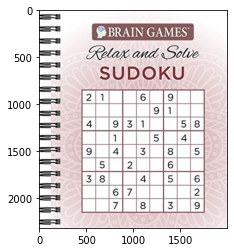

In [ ]:
#Randomly select an image from the dataset
sudoku_puzz= cv2.imread("/content/drive/MyDrive/Colab Notebooks/image.jpeg")
plt.figure()
#mg = sudoku.astype(float)
#image = mpimg.imread("/content/drive/MyDrive/Colab Notebooks/image")
plt.imshow(sudoku_puzz)
plt.show()
#print(sudoku)

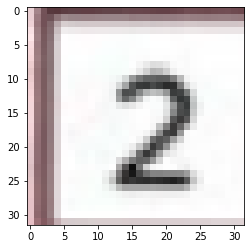

In [ ]:
sudoku_cell = splitcells(imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[0])
plt.show()

In [ ]:
sudoku_cell

[array([[[232, 207, 210],
         [164, 133, 138],
         [115,  82,  88],
         ...,
         [114,  78,  84],
         [110,  74,  80],
         [109,  72,  78]],
 
        [[234, 207, 211],
         [156, 124, 129],
         [114,  81,  87],
         ...,
         [151, 126, 130],
         [149, 123, 128],
         [149, 122, 126]],
 
        [[238, 210, 214],
         [152, 119, 124],
         [114,  81,  87],
         ...,
         [209, 197, 199],
         [209, 197, 199],
         [211, 197, 199]],
 
        ...,
 
        [[229, 194, 199],
         [144, 107, 112],
         [126,  92,  96],
         ...,
         [253, 252, 253],
         [254, 254, 254],
         [254, 253, 253]],
 
        [[229, 194, 199],
         [142, 104, 109],
         [124,  90,  95],
         ...,
         [255, 254, 255],
         [255, 254, 255],
         [255, 253, 254]],
 
        [[230, 191, 197],
         [154, 111, 117],
         [131,  90,  96],
         ...,
         [222, 212, 213],
  

In [ ]:
cells = np.array(sudoku_cell)

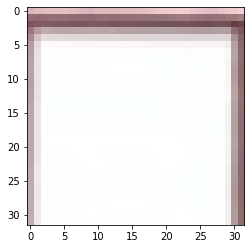

In [ ]:
plt.imshow(cells[8])

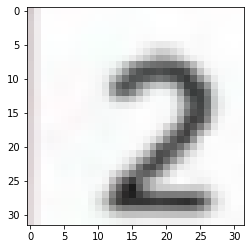

In [ ]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
      img = np.array(image)
      img = img[4:img.shape[0]-4, 4:img.shape[1]-4]
      img = cv2.resize(img,(32,32))
      img = img/255
      img = img.reshape(32,32,3)
      #img = Image.fromarray(img)
      Cells_croped.append(img)
    return Cells_croped
sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[0])
plt.show()

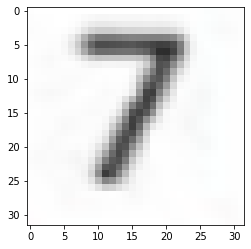

In [ ]:
plt.imshow(sudoku_cell_croped[74])

In [ ]:
cell1 = np.array(sudoku_cell_croped)

In [ ]:
cell1[74]

array([[[0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.98823529, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.98431373, 0.98431373, 0.98431373],
        [0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99215686]],

       ...,

       [[1.        , 0.99607843, 0.99607843],
        [1.        , 0.99607843, 0.99607843],
        [0.99607843, 0

In [ ]:
x = loaded_model.predict(cell1)
print(np.argmax(x[74]))


3/3 [==============================] - 0s 53ms/step
7


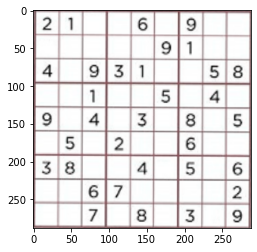

In [ ]:
plt.figure()
plt.imshow(imagewrap)
plt.show()

In [ ]:
cell1.shape

(81, 32, 32, 3)

In [ ]:
def identify_number(seq):
      grid=[]
    #image_resize = cv2.resize(image, (32,32))    # For plt.imshow
    #image_resize_2 = image.reshape(32,32,3)    # For input to model.predict_classes
#    cv2.imshow('number', image_test_1)
      loaded_model_pred = loaded_model.predict(seq , verbose = 0)
      prob = np.amax(loaded_model_pred, axis=1)
      digits = np.argmax(loaded_model_pred, axis =1)
      return prob 
      #pred = model.evaluate(digits,)
     # if prob< 0.8:
      ##  grid.append[0]
      #else:
       # grid.append[digits]
      #return grid

      

In [ ]:
for x in sudoku_cell_croped:
  print(x)

[[[0.82352941 0.78823529 0.79607843]
  [0.93333333 0.91764706 0.92156863]
  [0.99607843 0.99215686 0.99607843]
  ...
  [1.         0.99215686 0.99215686]
  [1.         0.99215686 0.99215686]
  [1.         0.99215686 0.99215686]]

 [[0.83529412 0.80392157 0.81176471]
  [0.9372549  0.92156863 0.92941176]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.84313725 0.81176471 0.81960784]
  [0.94117647 0.9254902  0.93333333]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.87843137 0.84705882 0.85098039]
  [0.95294118 0.9372549  0.94117647]
  [0.99215686 0.98823529 0.99215686]
  ...
  [0.97254902 0.97254902 0.97254902]
  [0.98823529 0.98823529 0.98823529]
  [0.98431373 0.98431373 0.98431373]]

 [[0.87843137 0.84705882 0.85098039]
  [0.95294118 0.9372549  0.94117647]


In [ ]:
loaded_model_pred = loaded_model.predict(cell1 , verbose = 0)
prob = np.amax(loaded_model_pred, axis=1)
digits = np.argmax(loaded_model_pred, axis =1)
index = []
for x in range(81):
    if prob[x]<0.30:
       index.append(x)
    else:
       pass
print(index)



[2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 23, 24, 27, 28, 30, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 50, 52, 53, 56, 57, 59, 61, 63, 64, 67, 68, 69, 70, 72, 73, 75, 77, 79]


In [ ]:
print(len(index))

46


In [ ]:
prob

array([0.9999989 , 0.95293874, 0.12575004, 0.12772353, 0.99999976,
       0.12928613, 0.9981981 , 0.13349275, 0.13277191, 0.12640348,
       0.12688492, 0.12649171, 0.12713826, 0.12677938, 0.9999864 ,
       0.9940556 , 0.12701268, 0.12745595, 0.999992  , 0.12709455,
       0.99999666, 0.9999958 , 0.98269594, 0.12704524, 0.12705635,
       0.9999988 , 0.9999982 , 0.12672049, 0.12690146, 0.9633477 ,
       0.12624498, 0.1270751 , 0.9999896 , 0.12771659, 0.9992073 ,
       0.12839016, 0.99984705, 0.12728895, 0.99999547, 0.12759504,
       0.9998659 , 0.12735619, 0.9999993 , 0.12805511, 0.99981874,
       0.1265412 , 0.9999869 , 0.1263545 , 0.9999658 , 0.12837355,
       0.12721358, 0.99999976, 0.12871633, 0.12724473, 0.9999927 ,
       0.9999994 , 0.1271028 , 0.12708957, 0.99152327, 0.12554176,
       0.999949  , 0.12680328, 0.99999297, 0.1273597 , 0.12685901,
       1.        , 0.99579716, 0.12672034, 0.12632778, 0.12645453,
       0.12655993, 0.99999774, 0.12747641, 0.12671903, 0.99462

In [ ]:
digits

array([2, 1, 1, 1, 6, 1, 9, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 4, 1, 9, 3,
       1, 1, 1, 5, 8, 1, 1, 1, 1, 1, 5, 1, 4, 1, 9, 1, 4, 1, 3, 1, 8, 1,
       5, 1, 5, 1, 2, 1, 1, 6, 1, 1, 3, 8, 1, 1, 4, 1, 5, 1, 6, 1, 1, 6,
       7, 1, 1, 1, 1, 2, 1, 1, 7, 1, 8, 1, 3, 1, 9])

In [ ]:
list_of_digits = digits.tolist()
numbers=[]
for x in range(len(list_of_digits)):
  #print(list_of_digits[x])
  string = str(list_of_digits[x])
  lst = numbers.append(string)
print(numbers)

#for x in digits:
 #  print(x)
  ##print(dig)
#print(dig)

['2', '1', '1', '1', '6', '1', '9', '1', '1', '1', '1', '1', '1', '1', '9', '1', '1', '1', '4', '1', '9', '3', '1', '1', '1', '5', '8', '1', '1', '1', '1', '1', '5', '1', '4', '1', '9', '1', '4', '1', '3', '1', '8', '1', '5', '1', '5', '1', '2', '1', '1', '6', '1', '1', '3', '8', '1', '1', '4', '1', '5', '1', '6', '1', '1', '6', '7', '1', '1', '1', '1', '2', '1', '1', '7', '1', '8', '1', '3', '1', '9']


In [ ]:
for i in index:
  print(list_of_digits[i])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
numbers

['2',
 '1',
 '1',
 '1',
 '6',
 '1',
 '9',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '9',
 '1',
 '1',
 '1',
 '4',
 '1',
 '9',
 '3',
 '1',
 '1',
 '1',
 '5',
 '8',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '4',
 '1',
 '9',
 '1',
 '4',
 '1',
 '3',
 '1',
 '8',
 '1',
 '5',
 '1',
 '5',
 '1',
 '2',
 '1',
 '1',
 '6',
 '1',
 '1',
 '3',
 '8',
 '1',
 '1',
 '4',
 '1',
 '5',
 '1',
 '6',
 '1',
 '1',
 '6',
 '7',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '7',
 '1',
 '8',
 '1',
 '3',
 '1',
 '9']

In [ ]:
for i in index: 
   digits = list(map(lambda x : x.replace(numbers[i],'0'), numbers))
   digits  
   

In [ ]:
for i in index:
  print(i)

2
3
5
7
8
9
10
11
12
13
16
17
19
23
24
27
28
30
31
33
35
37
39
41
43
45
47
49
50
52
53
56
57
59
61
63
64
67
68
69
70
72
73
75
77
79


In [ ]:
digits

['2',
 '0',
 '0',
 '0',
 '6',
 '0',
 '9',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '9',
 '0',
 '0',
 '0',
 '4',
 '0',
 '9',
 '3',
 '0',
 '0',
 '0',
 '5',
 '8',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5',
 '0',
 '4',
 '0',
 '9',
 '0',
 '4',
 '0',
 '3',
 '0',
 '8',
 '0',
 '5',
 '0',
 '5',
 '0',
 '2',
 '0',
 '0',
 '6',
 '0',
 '0',
 '3',
 '8',
 '0',
 '0',
 '4',
 '0',
 '5',
 '0',
 '6',
 '0',
 '0',
 '6',
 '7',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '7',
 '0',
 '8',
 '0',
 '3',
 '0',
 '9']

In [ ]:
integers=[]
for x in range(len(digits)):
  #print(list_of_digits[x])
  y = int(digits[x])
  lst = integers.append(y)
print(integers)


[2, 0, 0, 0, 6, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 4, 0, 9, 3, 0, 0, 0, 5, 8, 0, 0, 0, 0, 0, 5, 0, 4, 0, 9, 0, 4, 0, 3, 0, 8, 0, 5, 0, 5, 0, 2, 0, 0, 6, 0, 0, 3, 8, 0, 0, 4, 0, 5, 0, 6, 0, 0, 6, 7, 0, 0, 0, 0, 2, 0, 0, 7, 0, 8, 0, 3, 0, 9]


In [ ]:
integers = np.reshape(integers,(9,9))
integers

array([[2, 0, 0, 0, 6, 0, 9, 0, 0],
       [0, 0, 0, 0, 0, 9, 0, 0, 0],
       [4, 0, 9, 3, 0, 0, 0, 5, 8],
       [0, 0, 0, 0, 0, 5, 0, 4, 0],
       [9, 0, 4, 0, 3, 0, 8, 0, 5],
       [0, 5, 0, 2, 0, 0, 6, 0, 0],
       [3, 8, 0, 0, 4, 0, 5, 0, 6],
       [0, 0, 6, 7, 0, 0, 0, 0, 2],
       [0, 0, 7, 0, 8, 0, 3, 0, 9]])

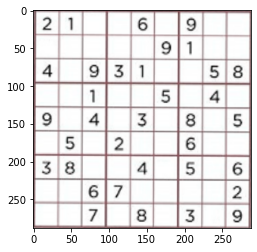

In [ ]:
plt.figure()
plt.imshow(imagewrap)
plt.show()

In [ ]:
integers

array([[2, 0, 0, 0, 6, 0, 9, 0, 0],
       [0, 0, 0, 0, 0, 9, 0, 0, 0],
       [4, 0, 9, 3, 0, 0, 0, 5, 8],
       [0, 0, 0, 0, 0, 5, 0, 4, 0],
       [9, 0, 4, 0, 3, 0, 8, 0, 5],
       [0, 5, 0, 2, 0, 0, 6, 0, 0],
       [3, 8, 0, 0, 4, 0, 5, 0, 6],
       [0, 0, 6, 7, 0, 0, 0, 0, 2],
       [0, 0, 7, 0, 8, 0, 3, 0, 9]])

In [ ]:
# N is the size of the 2D matrix   N*N
N = 9
 
# A utility function to print grid
def printing(arr):
    for i in range(N):
        for j in range(N):
            print(arr[i][j], end = " ")
        print()
 
# Checks whether it will be
# legal to assign num to the
# given row, col
def isSafe(grid, row, col, num):
   
    # Check if we find the same num
    # in the similar row , we
    # return false
    for x in range(9):
        if grid[row][x] == num:
            return False
 
    # Check if we find the same num in
    # the similar column , we
    # return false
    for x in range(9):
        if grid[x][col] == num:
            return False
 
    # Check if we find the same num in
    # the particular 3*3 matrix,
    # we return false
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True
 
# Takes a partially filled-in grid and attempts
# to assign values to all unassigned locations in
# such a way to meet the requirements for
# Sudoku solution (non-duplication across rows,
# columns, and boxes) */
def solveSudoku(grid, row, col):
   
    # Check if we have reached the 8th
    # row and 9th column (0
    # indexed matrix) , we are
    # returning true to avoid
    # further backtracking
    if (row == N - 1 and col == N):
        return True
       
    # Check if column value  becomes 9 ,
    # we move to next row and
    # column start from 0
    if col == N:
        row += 1
        col = 0
 
    # Check if the current position of
    # the grid already contains
    # value >0, we iterate for next column
    if grid[row][col] > 0:
        return solveSudoku(grid, row, col + 1)
    for num in range(1, N + 1, 1):
       
        # Check if it is safe to place
        # the num (1-9)  in the
        # given row ,col  ->we
        # move to next column
        if isSafe(grid, row, col, num):
           
            # Assigning the num in
            # the current (row,col)
            # position of the grid
            # and assuming our assigned
            # num in the position
            # is correct
            grid[row][col] = num
 
            # Checking for next possibility with next
            # column
            if solveSudoku(grid, row, col + 1):
                return True
 
        # Removing the assigned num ,
        # since our assumption
        # was wrong , and we go for
        # next assumption with
        # diff num value
        grid[row][col] = 0
    return False

In [ ]:
if (solveSudoku(integers, 0, 0)):
    printing(integers)
else:
    print("no solution  exists ")

2 1 5 4 6 8 9 3 7 
7 3 8 5 1 9 2 6 4 
4 6 9 3 2 7 1 5 8 
6 2 1 8 9 5 7 4 3 
9 7 4 1 3 6 8 2 5 
8 5 3 2 7 4 6 9 1 
3 8 2 9 4 1 5 7 6 
1 9 6 7 5 3 4 8 2 
5 4 7 6 8 2 3 1 9 
